In [1]:
# LAB - Cleaning numerical data

In [2]:
# 1. Import the necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os 
import math 
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
# 2. Load we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [5]:
customer_df = pd.read_csv ("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [6]:
# 3. First, look at its main features (head, shape, info).

In [7]:
customer_df.head(1)

Customer       State  Customer Lifetime Value Response Coverage Education  \
0  BU79786  Washington              2763.519279       No    Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   

  Sales Channel  Total Claim Amount Vehicle Class Vehicle Size  
0         Agent          384.811147  Two-Door Car      Medsize

In [8]:
customer_df.shape


(9134, 24)

In [9]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [11]:
customer_df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [12]:
# 4. Rename the columns so they follow the PE8 (snake case).

In [13]:
cols = [col_name.lower().replace(" ", "_") for col_name in customer_df.columns]
customer_df.columns = cols
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [14]:
# 5. Fix the data types of any other column/columns as you might see necessary. Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [15]:
customer_df.head(1)
#effective to date

customer       state  customer_lifetime_value response coverage education  \
0  BU79786  Washington              2763.519279       No    Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   

  sales_channel  total_claim_amount vehicle_class vehicle_size  
0         Agent          384.811147  Two-Door Car      Medsize

In [16]:
from datetime import datetime

In [17]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0        2011-02-24         Employed      F   56274      Suburban   
1        2011-01-31       Unemployed      F       0      Suburban   
2        2011-02-19         Employed      F   48767      Suburban   
3        2011-01-20       Unemployed      M       0      Suburban   
4        2011-02-03         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [18]:
# 7. Plot every continuous variable. Comment what you can see in the plots.

In [19]:
df_cont_var = customer_df[['customer_lifetime_value','total_claim_amount']]
df_cont_var.head()

customer_lifetime_value  total_claim_amount
0              2763.519279          384.811147
1              6979.535903         1131.464935
2             12887.431650          566.472247
3              7645.861827          529.881344
4              2813.692575          138.130879

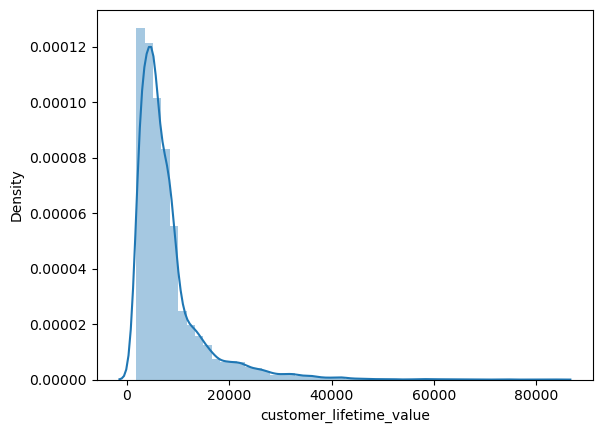

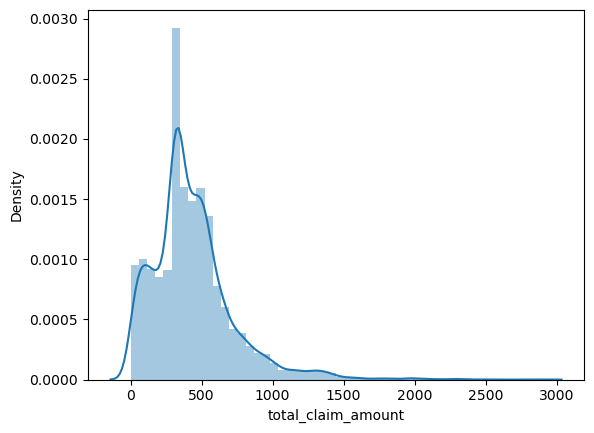

In [20]:
for column in df_cont_var.columns:
    sns.distplot(df_cont_var[column])
    plt.show()

In [21]:
# In the 1st graph we can view the values skewed to the right. (some outliers in the higher range)
# In the 2nd one we can view something closer to normal distribution

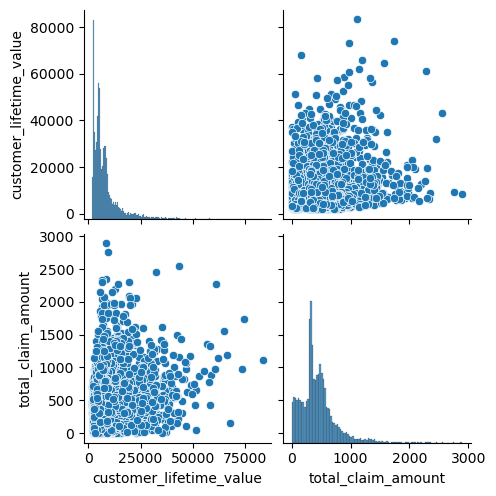

In [22]:
sns.pairplot(df_cont_var)

In [23]:
# 8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. 
# You should also delete the column customer_id before 
# you can try to use a for loop on all the categorical columns. 
# Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot 

In [24]:
cat_customer = customer_df.select_dtypes(include = "object")
cat_customer.head(1)

customer       state response coverage education employmentstatus gender  \
0  BU79786  Washington       No    Basic  Bachelor         Employed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   

  sales_channel vehicle_class vehicle_size  
0         Agent  Two-Door Car      Medsize

In [25]:
cat_customer = cat_customer.drop("customer", axis = 1)
cat_customer.head(1)

state response coverage education employmentstatus gender  \
0  Washington       No    Basic  Bachelor         Employed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   

  sales_channel vehicle_class vehicle_size  
0         Agent  Two-Door Car      Medsize

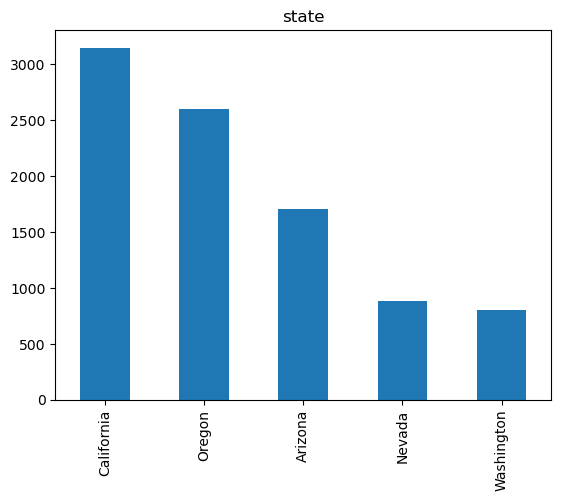

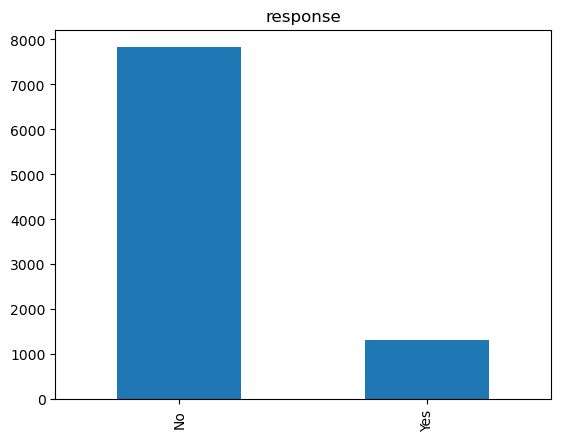

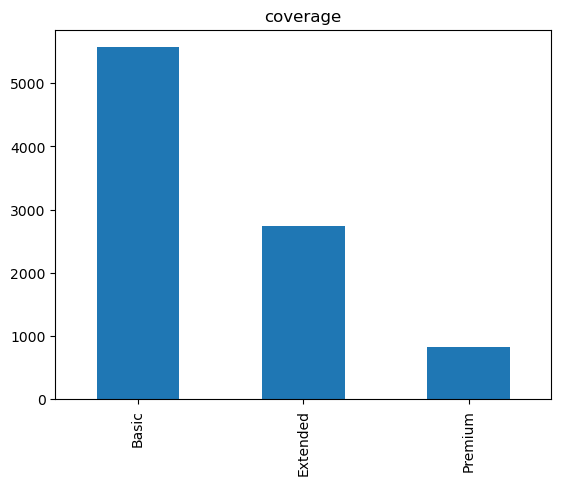

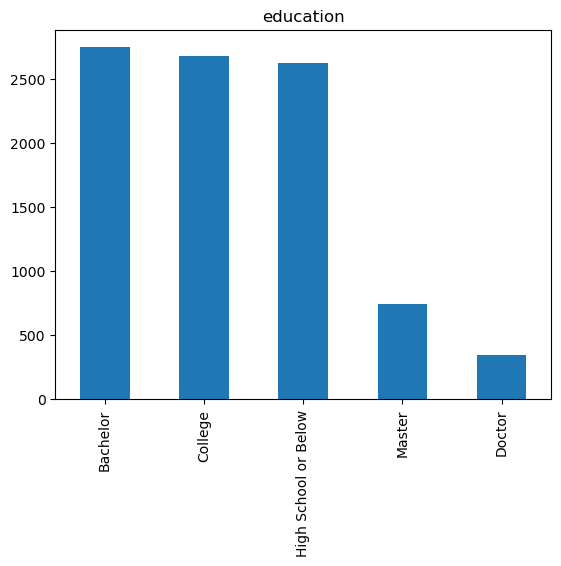

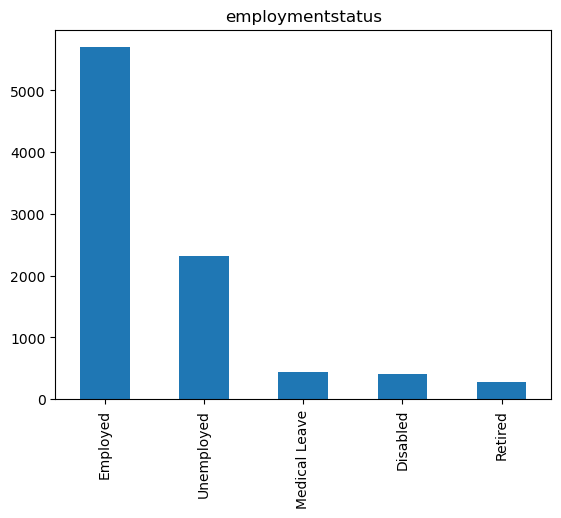

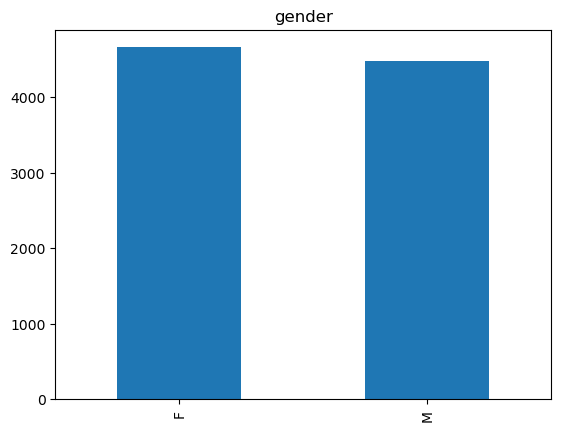

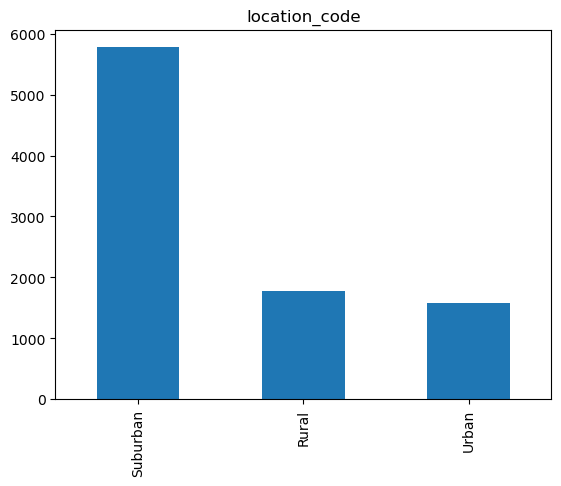

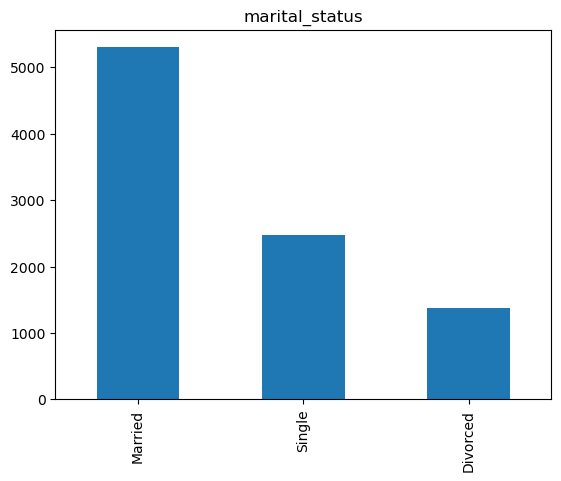

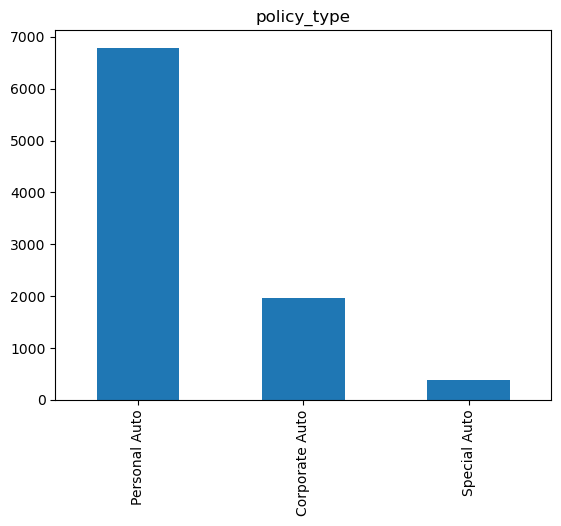

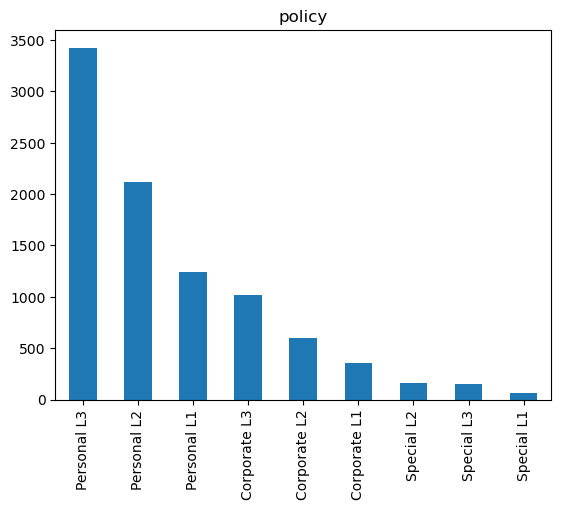

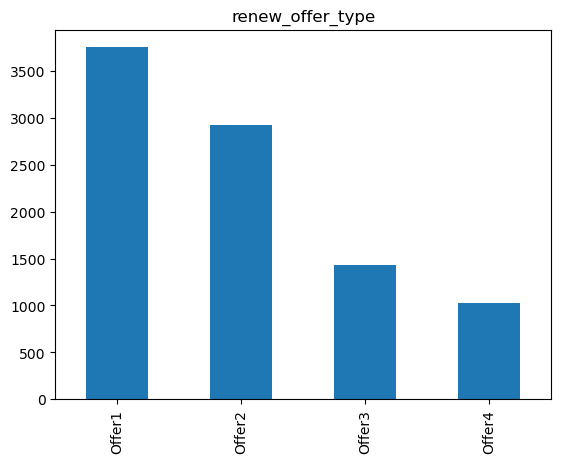

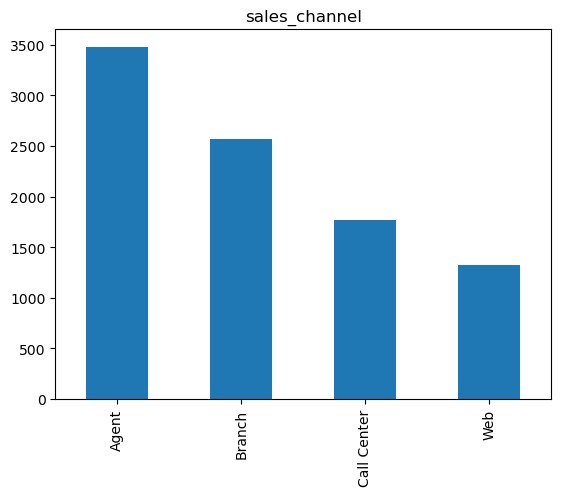

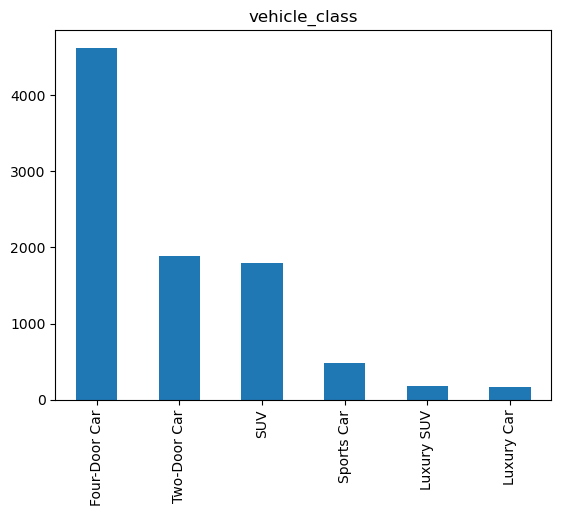

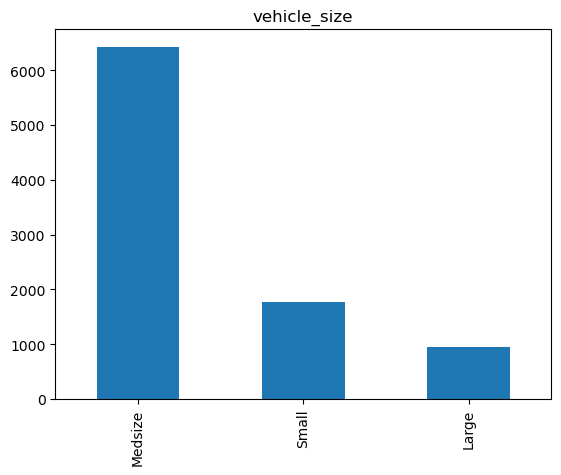

In [26]:
for col in cat_customer.columns:
    plt.figure()
    cat_customer[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [27]:
# customer doesn't have any statistical value

In [28]:
# 9. Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

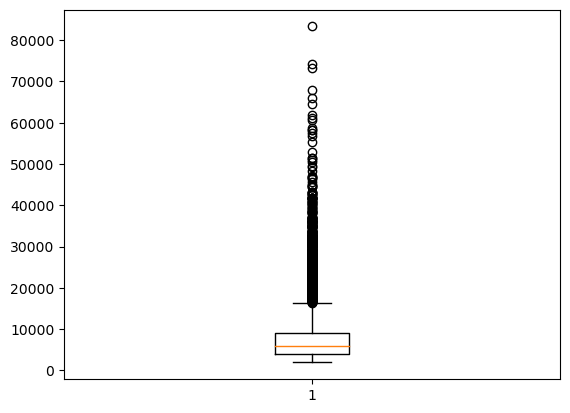

In [29]:
plt.boxplot(df_cont_var["customer_lifetime_value"])
plt.show()

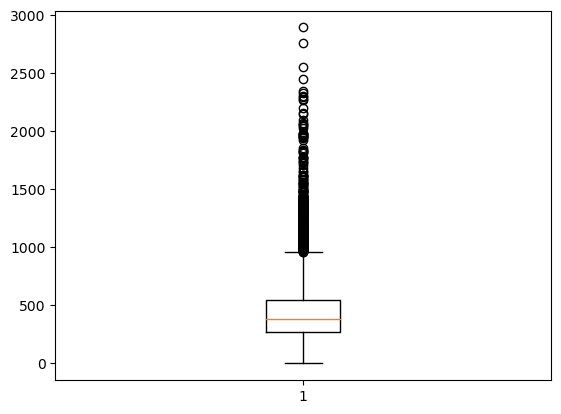

In [30]:
plt.boxplot(df_cont_var["total_claim_amount"])
plt.show()

In [31]:
# 10.Check all columns for NaN values.  Decide what (if anything) you will need to do with them.

In [32]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [33]:
# No NaNsssssss

In [34]:
# Just to try the EDA report

In [35]:
!pip install ydata-profiling # installing the library

import pandas as pd
from ydata_profiling import ProfileReport

In [36]:
eda_report = ProfileReport(customer_df, title = "EDA Report - customer_df")
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
eda_report.to_file("EDA_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]